# Vehical Mileage Performance Prediction

### Problem Statement:
The objective of the dataset is to predict performance of vehicle i.e. predicting the vehical milage  / liter of oil

# Attribute Information:

1.Kilometer_per_liter: distance in kilometer traveled per liter

2.cylinders: No of cylinders

3.displacement: displacement

4.horsepower: Horsepower is a unit of measurement of power, or the rate at which work is done, usually in reference to the output of engines or motors

5.weight: Weight of car

6.acceleration: Acceleration of Car

7.model year: Model Year of the car

8.origin: Country origin

9.car name: Car brand and model name (unique for each instance)

### Steps

Import Packages

Read Data

Data Preprocessing

3.1 - Data Types and Dimensions

3.2 - Checking for Missing Values

3.3 - Data Correction

3.4 - Statistical Summary

EDA

4.1 - Univariate Analysis

4.2 - Multivariate Analysis

4.3 - Covariance

4.4 - Correlation

Label Encoding of Categorical Data

Standardise Data

Linear Regression

7.1 - Ordinary Least Square

7.2 - Linear Regression using SGD

Model Comparision

### Import Libraries

In [143]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
sns.set

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Set options

In [144]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
np.set_printoptions(suppress = True)

### Read the Data

In [145]:
raw_data = pd.read_csv(r"D:\Imarticus\ML\Supervised learning\2-Regression  -Linear Regression SGD(optimization technique)\data.csv")
raw_data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [146]:
data = raw_data.copy(deep = True)

In [147]:
data.shape

(398, 9)

### EDA

The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis.

Here we will analyze and prepare data :
1. Check dimensions and data types of the dataframe
2. Data Correction
3. Study summary statistics
4. Check for missing values

### Info

In [148]:
data.shape

(398, 9)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [150]:
data["origin"].unique()

array([1, 3, 2], dtype=int64)

### Lets Convert the DataTypes

In [151]:
data["origin"] = data["origin"].astype("object")

In [152]:
data["cylinders"] = data["cylinders"].astype("object")

In [153]:
data.name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [154]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

### Removing the "?" from the horspower as we don't have data in the variable

In [155]:
data= data[data["horsepower"] != "?"]

In [156]:
"?" in data.horsepower

False

In [157]:
data.shape

(392, 9)

In [158]:
data["horsepower"] = data["horsepower"].astype("float")

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 38.7+ KB


### On to preparing the categorical features :

1.model_year is ordinal. So we simply stick to dtype int.

2.origin is a true categorical. We already encoded it.

3.name actually contains two useful bits of information: the cars manufacturer and the model. We split that into two new columns.

In [160]:
data_1 = data.copy(deep = True)

### Constructing Name column to make 2 diffrent Name and model Column

In [161]:
# split() with expand=True yields one column per list element
# we only split on the first space by setting n=1
data_1[["manufracturer","model"]] = data_1["name"].str.split(" " ,n = 1, expand = True)

In [162]:
data_1.drop(["name"],axis = 1, inplace = True)

In [163]:
data_1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufracturer,model
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevelle malibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark 320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebel sst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino


In [164]:
data_1.shape

(392, 10)

In [165]:
data_1.manufracturer.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [166]:
print(sorted(data_1.manufracturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


In [167]:
data_1.manufracturer.unique().shape

(37,)

**There are several errors in the manufacturers names. E.g. «vokswagen», «maxda» etc. We fix these by replacing the wrong entries. We also fix some synomyms like «vw».**

In [168]:
error = {
    "vokswagen":"volkswagen",
         "vw":"volkswagen",
         "toyouta":"toyota",
         "mercerdes=benz":"mercedes",
         "chevroelt":"chevrolet",
         "chevy":"chevrolet",
         "maxda":"mazda"
        }
data_1["manufracturer"] = data_1["manufracturer"].map(error).fillna(data_1["manufracturer"])

In [169]:
data_1.manufracturer.unique().shape

(31,)

In [170]:
data_1.model.tail(10)

388    lebaron medallion
389            granada l
390            celica gt
391          charger 2.2
392               camaro
393           mustang gl
394               pickup
395              rampage
396               ranger
397                 s-10
Name: model, dtype: object

**Some model names also seem redundant or wrong.**

Hand checking would be way too time-consuming so we only improve this features brute-force by removing all special characters.

In [171]:
#import request lib
import re
def alphanumeric(x):
    return re.sub("[^A-Za-z0-9]","", (str(x)))

data_1["model"] = data_1.model.apply(lambda x: alphanumeric(x))
# re.sub() function searches for the pattern in the string and replaces the matched strings with the
#replacement string 

In [172]:
data_1.model.tail(10)

388    lebaronmedallion
389            granadal
390            celicagt
391           charger22
392              camaro
393           mustanggl
394              pickup
395             rampage
396              ranger
397                 s10
Name: model, dtype: object

In [173]:
data_1.shape

(392, 10)

In [174]:
print((data_1.model.nunique()))

293


In [175]:
data_1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufracturer,model
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino


### Statistical Summary


In [176]:
data_1.describe()

,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [177]:
data_1.describe(include = object)

,origin,cylinders,manufracturer,model
count,392,392,392,392
unique,3,5,31,293
top,1,4,ford,rabbit
freq,245,199,48,5


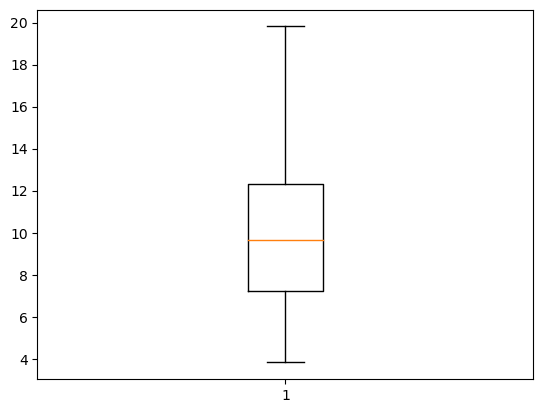

In [178]:
plt.boxplot(data_1.Kilometer_per_liter)
plt.show()

In [179]:
Q1 = data_1.Kilometer_per_liter.quantile(0.25)
Q3 = data_1.Kilometer_per_liter.quantile(0.75)
IQR = Q3-Q1
lower_cut = Q1-1.5*IQR
upper_cut = Q3+1.5*IQR
#data.Kilometer_per_liter.clip(lower=lower_cut, upper=upper_cut)
data_1 = data_1[(data_1.Kilometer_per_liter >= lower_cut)&(data_1.Kilometer_per_liter <= upper_cut)]

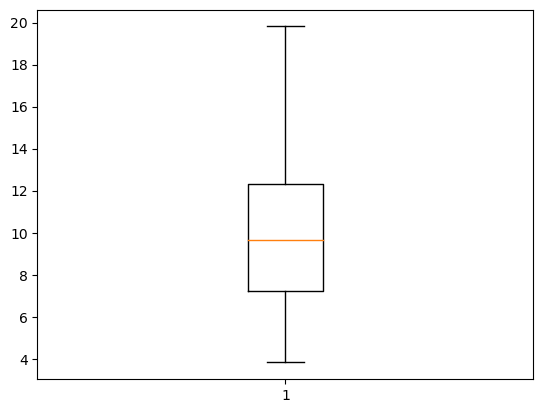

In [180]:
plt.boxplot(data_1.Kilometer_per_liter)
plt.show()

In [181]:
data_1.shape

(392, 10)

### Distribution of Variable


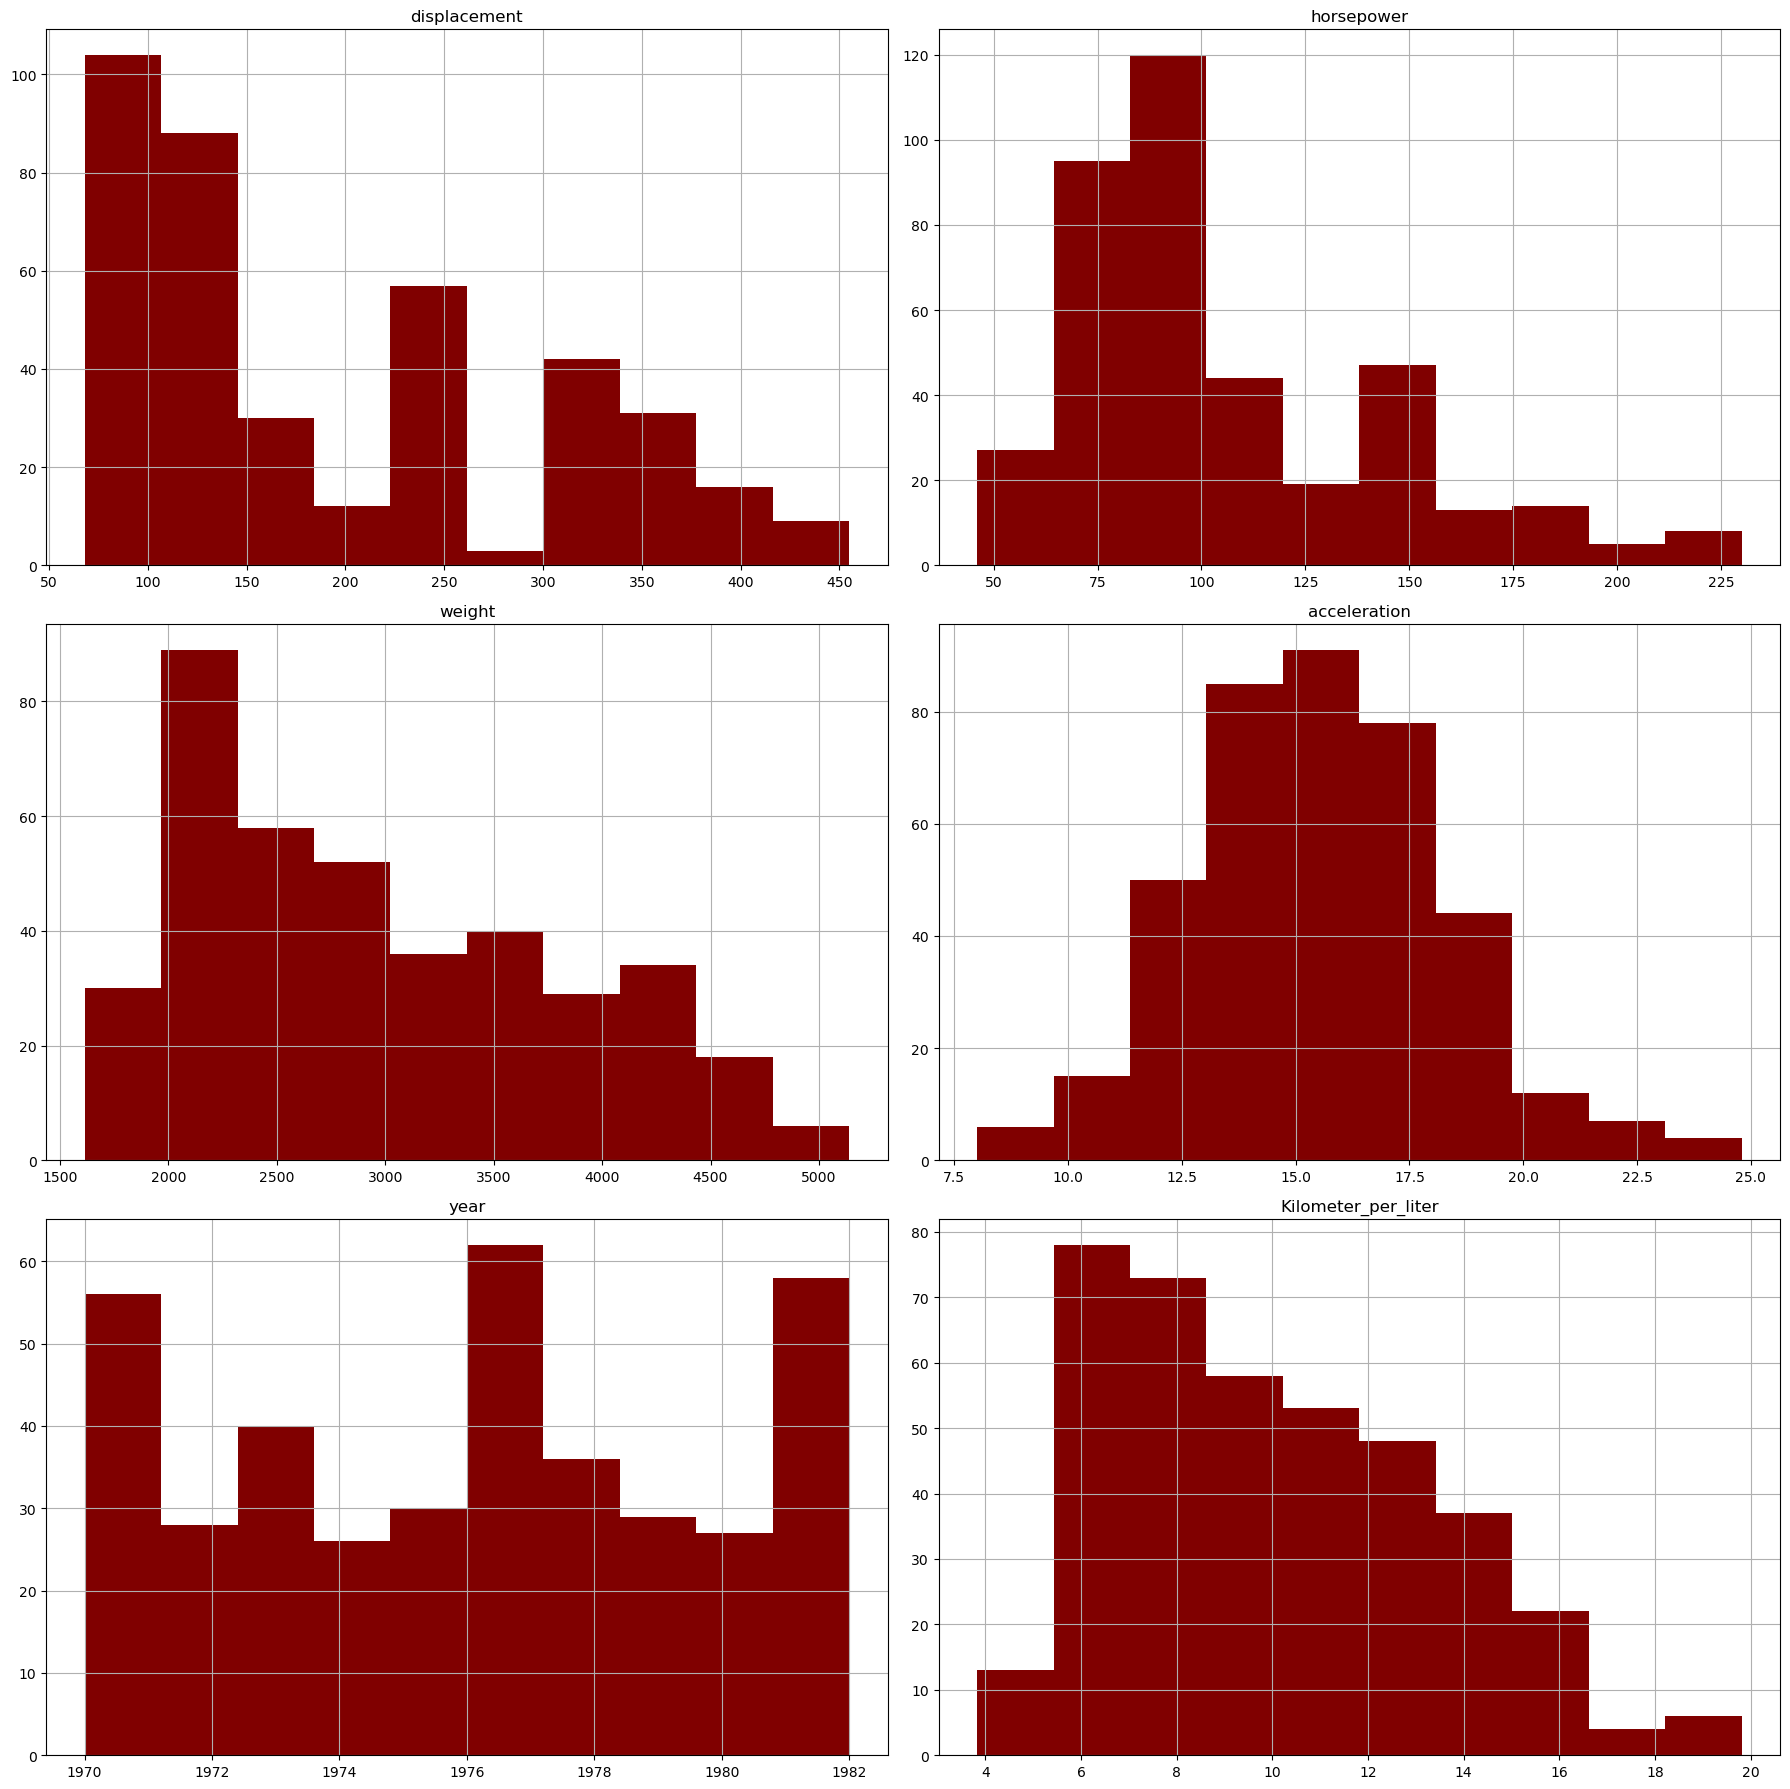

In [182]:
data_1.hist(color = "maroon",figsize = (18,18))
plt.tight_layout()
plt.show()

### Study Correlation

In [183]:
numeric_df= data_1.select_dtypes(include = "number")

In [184]:
numeric_df.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration', 'year',
       'Kilometer_per_liter'],
      dtype='object')

In [185]:
corrmat =  numeric_df.corr()
print(corrmat)

                     displacement  horsepower    weight  acceleration  \
displacement             1.000000    0.897257  0.932994     -0.543800   
horsepower               0.897257    1.000000  0.864538     -0.689196   
weight                   0.932994    0.864538  1.000000     -0.416839   
acceleration            -0.543800   -0.689196 -0.416839      1.000000   
year                    -0.369855   -0.416361 -0.309120      0.290316   
Kilometer_per_liter     -0.805127   -0.778427 -0.832244      0.423329   

                         year  Kilometer_per_liter  
displacement        -0.369855            -0.805127  
horsepower          -0.416361            -0.778427  
weight              -0.309120            -0.832244  
acceleration         0.290316             0.423329  
year                 1.000000             0.580541  
Kilometer_per_liter  0.580541             1.000000  


### Ploting Heatmap to correlation visulization

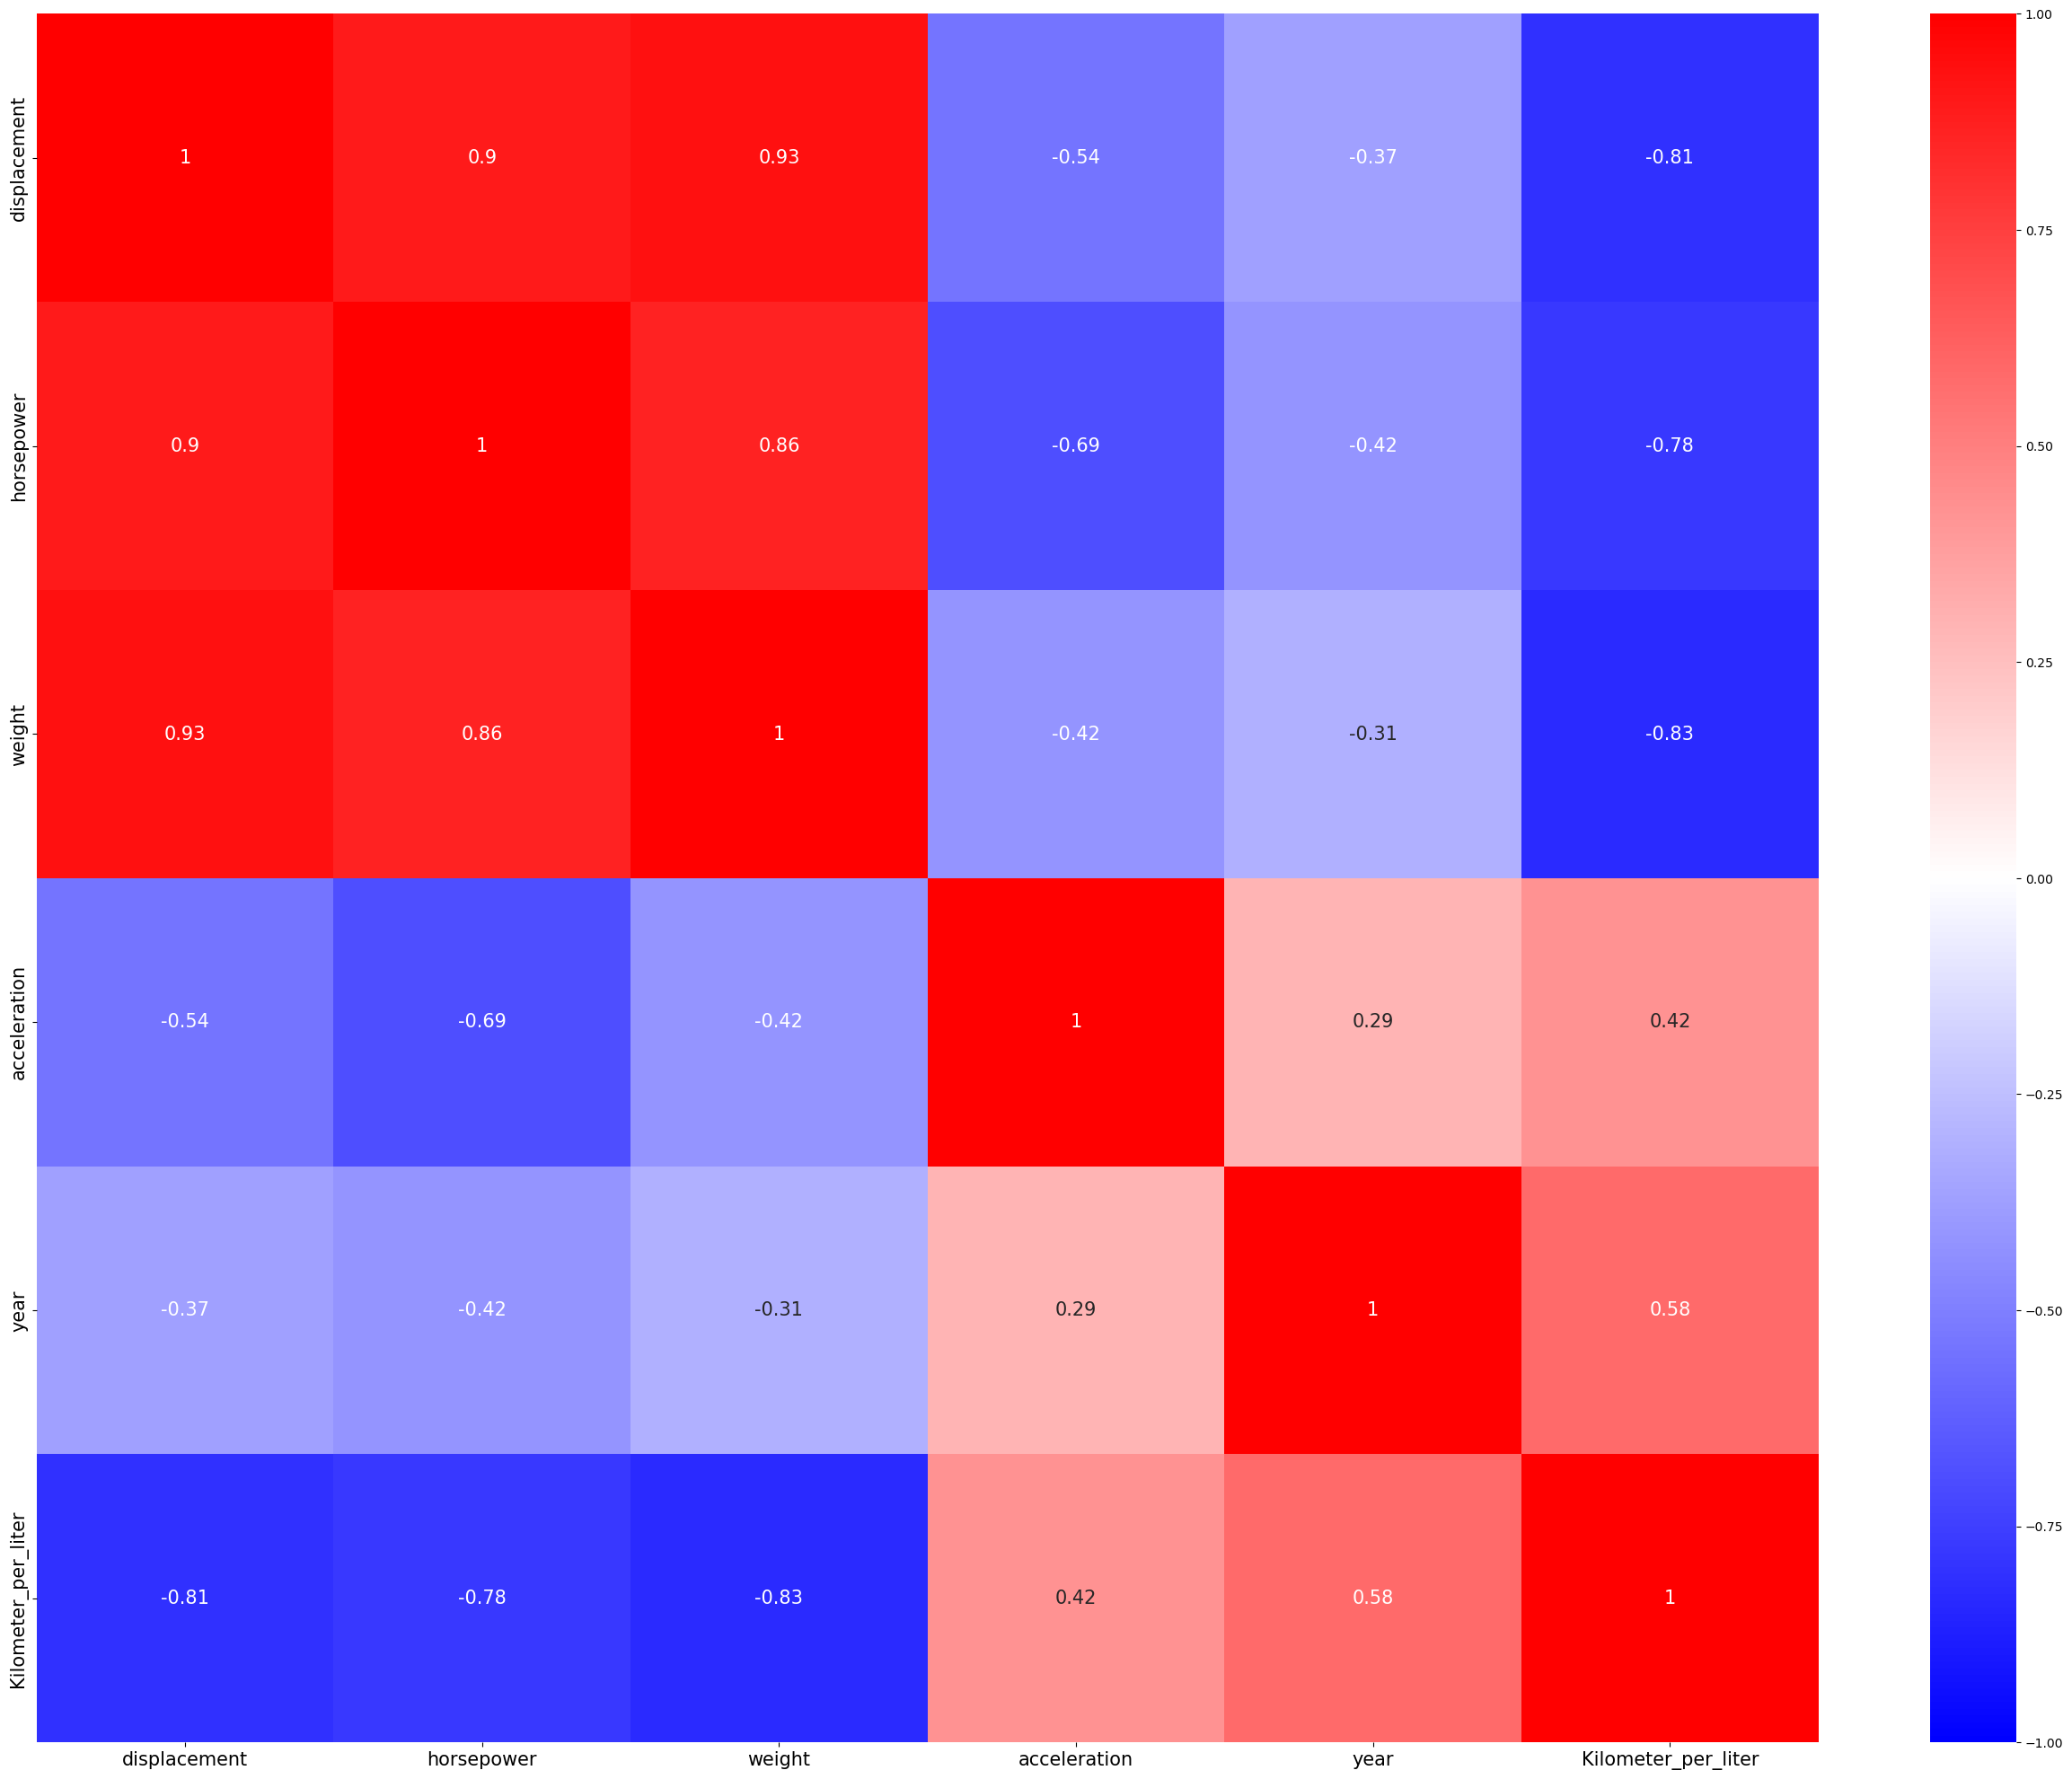

In [186]:
plt.figure(figsize=(32,25))
sns.heatmap(corrmat,annot = True,vmax=1.0,vmin= -1.0, cmap = "bwr", annot_kws = {"size":15})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [187]:
data_1.Kilometer_per_liter.describe()

count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

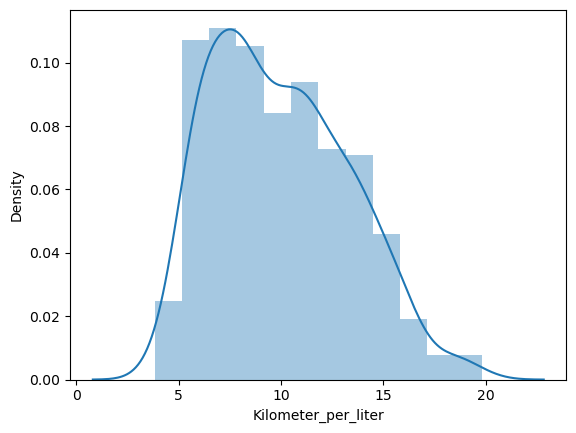

In [188]:
sns.distplot(data_1.Kilometer_per_liter)
plt.show()

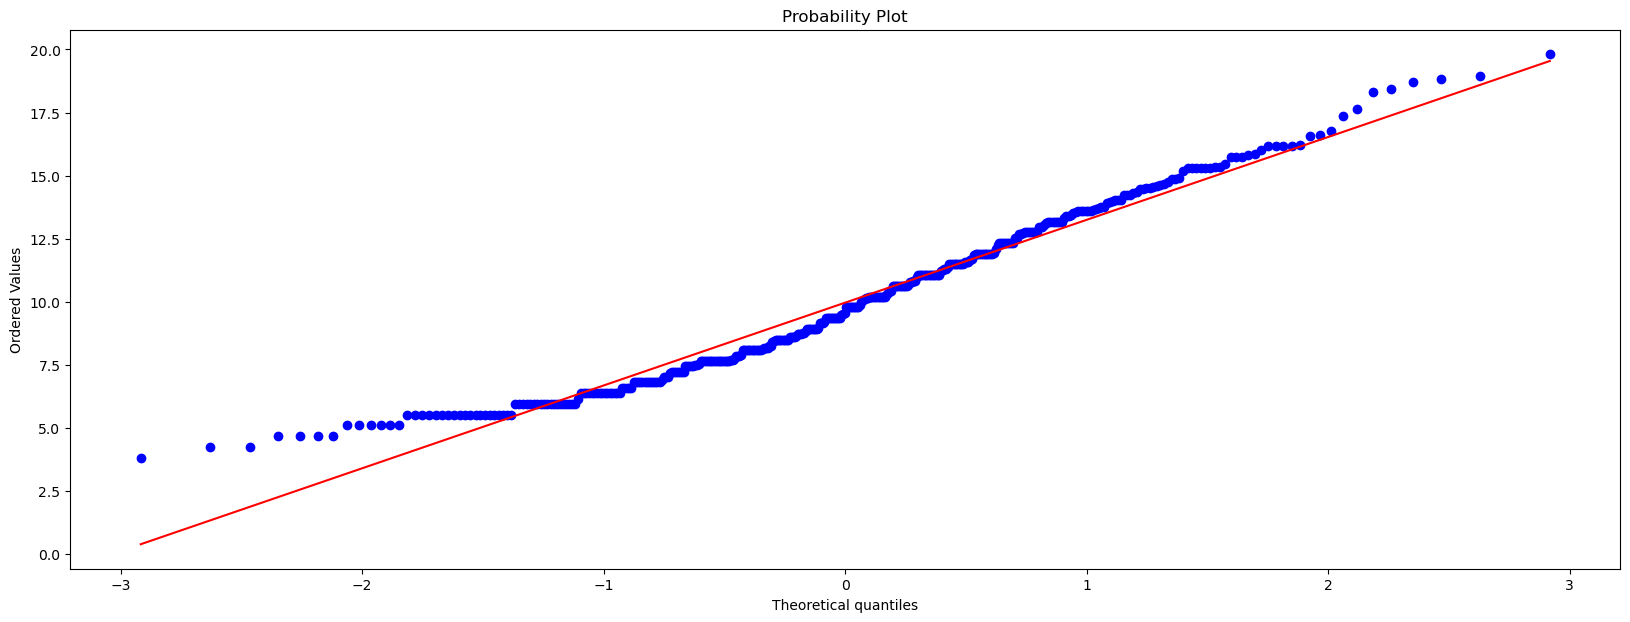

We expect that our data points will be on red line for gaussian distribution. We see dist tails


In [189]:
plt.figure(figsize=(20,7))
stats.probplot(data["Kilometer_per_liter"],plot = plt)
plt.show()
print("We expect that our data points will be on red line for gaussian distribution. We see dist tails")

In [190]:
print("Skewness: %f" % data_1["Kilometer_per_liter"].skew())
print("Kurtosis: %f" % data_1["Kilometer_per_liter"].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [191]:
stat, p = shapiro(data_1.Kilometer_per_liter)

print("Statistics = %.3f,P-value =%.3f" % (stat,p))

alpha = 0.05

if p > alpha:
    print("The Data is normallly Distributed(Accept the Null Hypothesis )")
else:
    print("Data is Not Normally Distributed (Reject the Null Hypothesis )")

Statistics = 0.967,P-value =0.000
Data is Not Normally Distributed (Reject the Null Hypothesis )


### As the Data is Not Normally Distributed use Log to trancefer the data

In [192]:
data_2 = data_1.copy(deep = True)

In [193]:
data_2["log_Kilometer_per_liter"] = np.log(data_2.Kilometer_per_liter)

In [194]:
data_2.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufracturer,model,log_Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320,1.852722
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite,2.035044
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst,1.917261
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino,1.977885


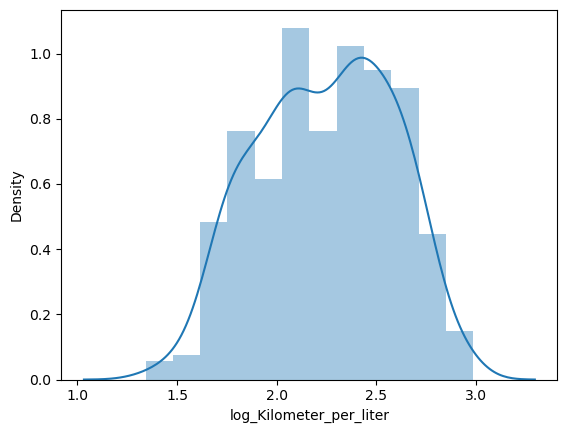

In [195]:
sns.distplot(data_2.log_Kilometer_per_liter)
plt.show()

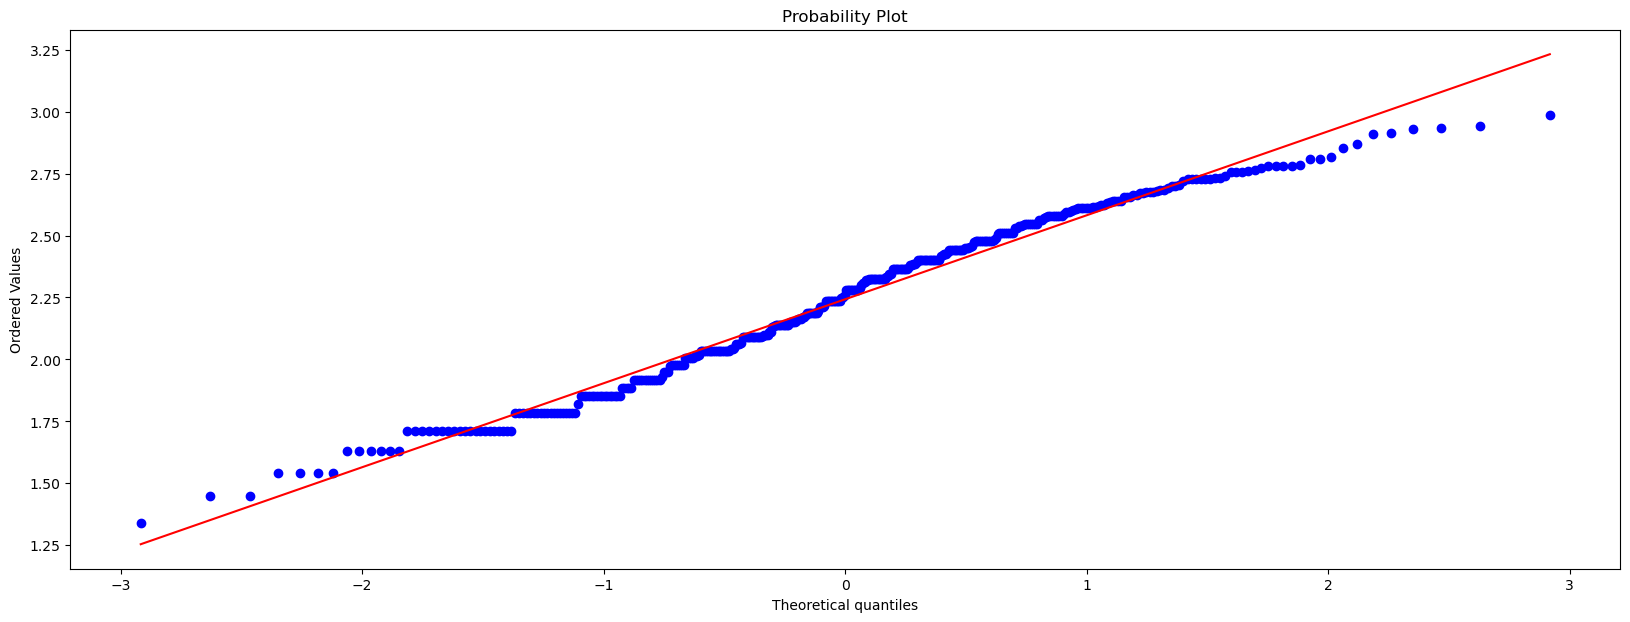

We expect that our data points will be on red line for gaussian distributin. We see dist tails


In [196]:
plt.figure(figsize = (20,7))
stats.probplot(data_2.log_Kilometer_per_liter,plot= plt)
plt.show()
print("We expect that our data points will be on red line for gaussian distributin. We see dist tails")

In [197]:
print("Skewness : %f" % data_2["log_Kilometer_per_liter"].skew())
print("kurtosis : %f" % data_2["log_Kilometer_per_liter"].kurt())

Skewness : -0.131382
kurtosis : -0.817837


**From above plots we can see that mileage is normally distributed**

### Distribution of Displacement
Engine displacement is the swept volume of all the pistons inside the cylinders of a reciprocating engine in a single movement from top dead centre (TDC) to bottom dead centre (BDC).

In [198]:
data_2.displacement.describe()

count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64

<AxesSubplot:xlabel='displacement', ylabel='Density'>

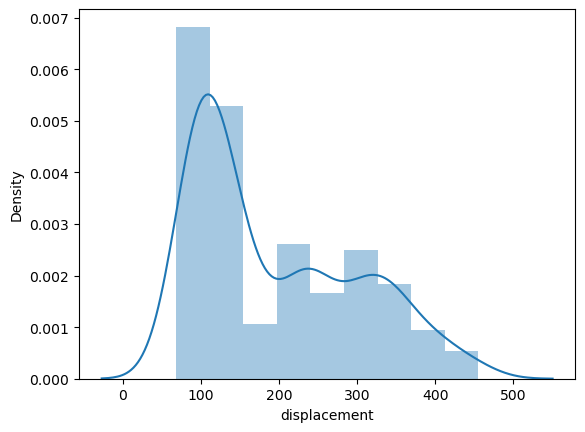

In [199]:
sns.distplot(data_2.displacement)

### Analysis of Cylinder

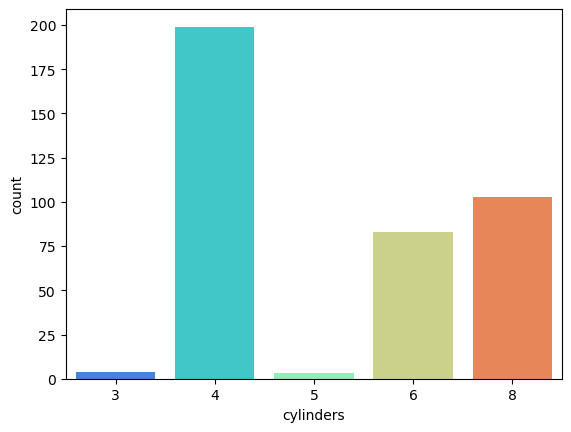

In [200]:
sns.countplot(data_2.cylinders,palette = "rainbow")
plt.show()

### From above Countplot

From the above above plot we can visualize that there are maximum number of 4 cylinder vehicles.
Around 98% of the vehicles are either of 4, 6, 8 cylinders and only small percent of vehicles are either of 3 and 5 cylinders.

### Analysis of Model Year

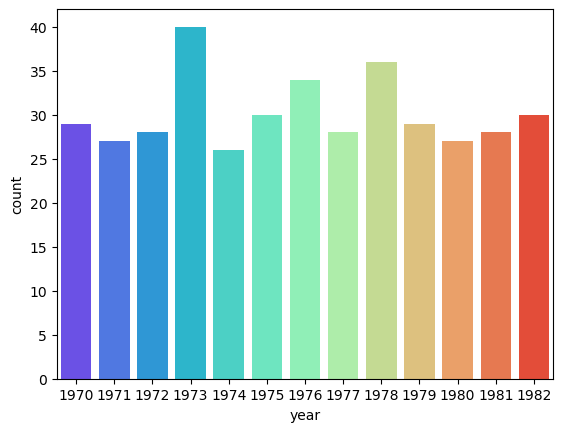

In [201]:
sns.countplot(data_2['year'],palette = "rainbow")
plt.show()

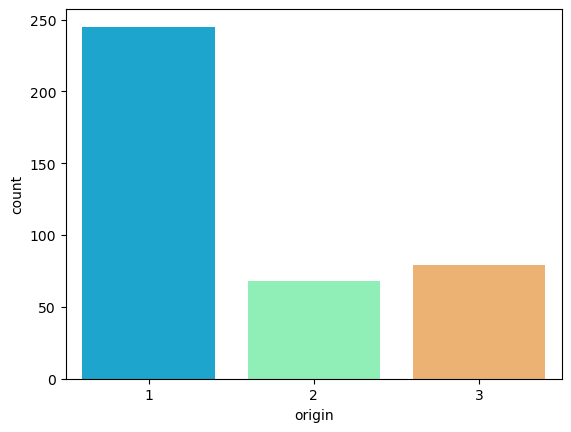

In [202]:
sns.countplot(data_2.origin,palette = "rainbow")
plt.show()

### Analysis of Horsepower

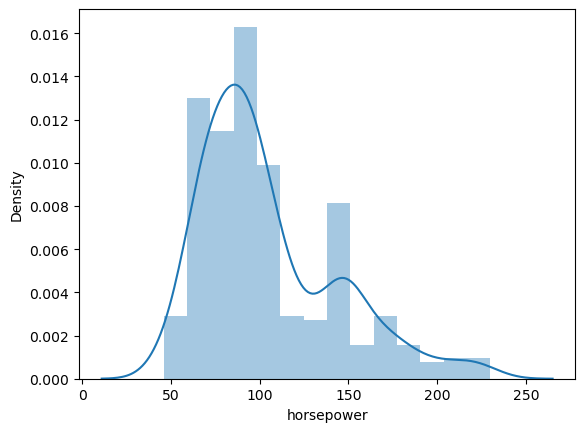

In [203]:
sns.distplot(data_2.horsepower)
plt.show()

#### Analysis of Manufracturer

In [204]:
!pip install tabulate

In [205]:
 from tabulate import tabulate

car from 31 manufracturer (top10)
----------  --
ford        48
chevrolet   47
plymouth    31
dodge       28
amc         27
toyota      26
datsun      23
volkswagen  22
buick       17
pontiac     16
----------  --


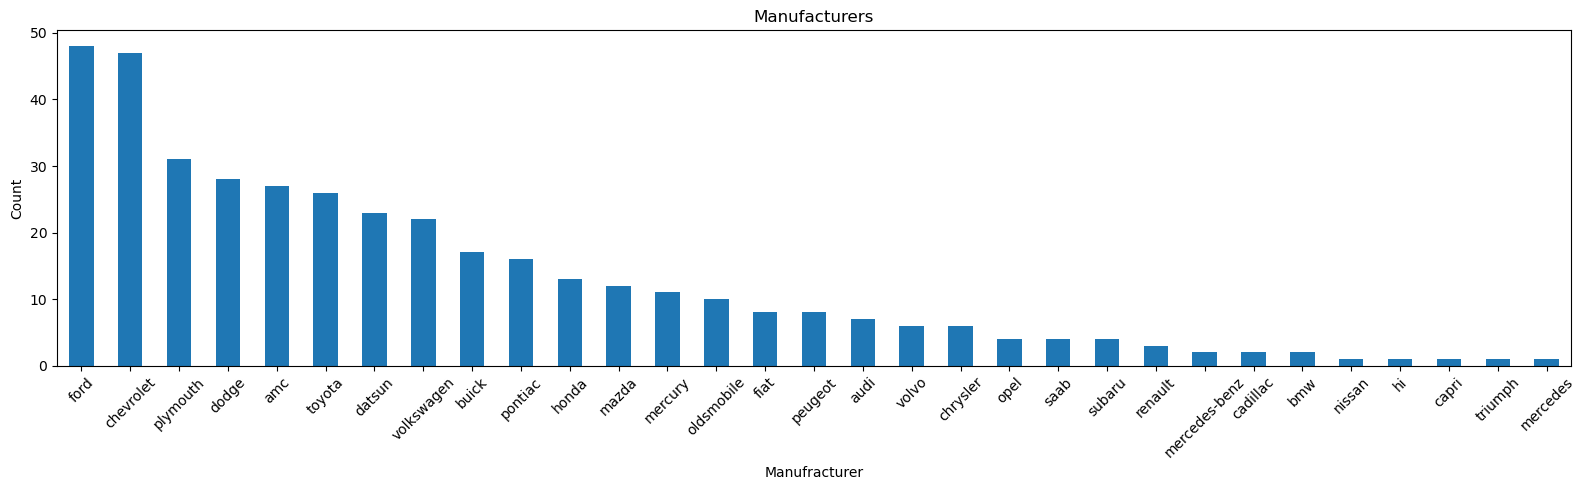

In [206]:
print(f"car from {data_2.manufracturer.nunique()} manufracturer (top10)")
print(tabulate(pd.DataFrame(data_2.manufracturer.value_counts()[:10])))

plt.figure(figsize = (16,5))
data_2.groupby("manufracturer")["manufracturer"].count().sort_values(ascending = False).plot(kind="bar")
plt.title("Manufacturers")
plt.xlabel("Manufracturer")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

car from 293 model (top10)
--------  -
rabbit    5
pinto     5
corolla   5
matador   5
chevette  4
maverick  4
hornet    4
impala    4
corona    4
504       4
--------  -


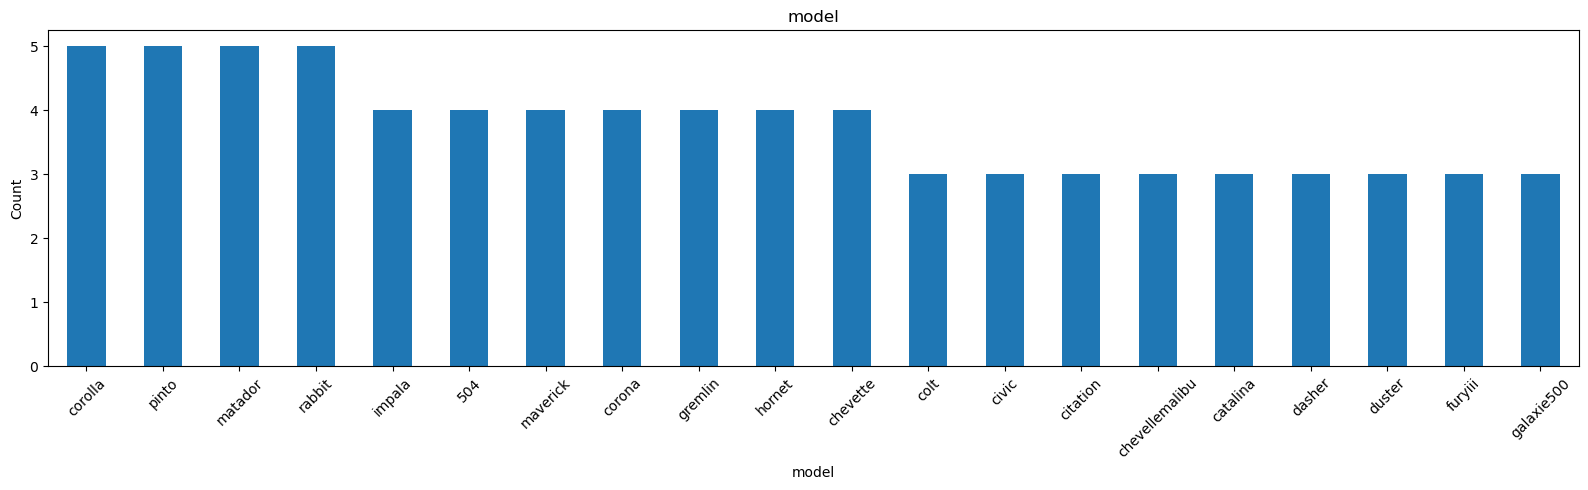

In [207]:
print(f"car from {data_2.model.nunique()} model (top10)")
print(tabulate(pd.DataFrame(data_2.model.value_counts()[:10])))

plt.figure(figsize = (16,5))
data_2.groupby("model")["model"].count().sort_values(ascending = False)[:20].plot(kind="bar")
plt.title("model")
plt.xlabel("model")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### Multivariate Analysis

**Analysis of Kilometer_per_liter vs Hourse**

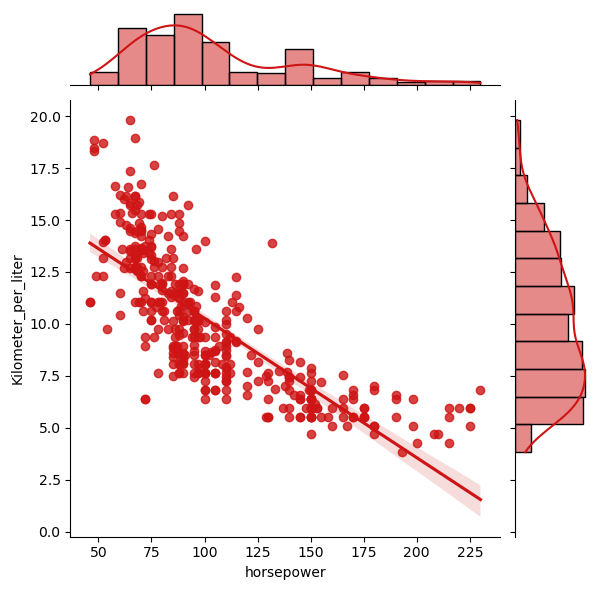

In [208]:
x = data_2[["horsepower","Kilometer_per_liter"]]
sns.jointplot(x = x.loc[:,"horsepower"], y = x.loc[:,"Kilometer_per_liter"], kind = "reg", color = "#ce1414")
plt.show()

**We can see from the plot that as horsepower increase Kilometer_per_liter decreases.**

#### Analysis of Kilometer_per_liter vs Hourse

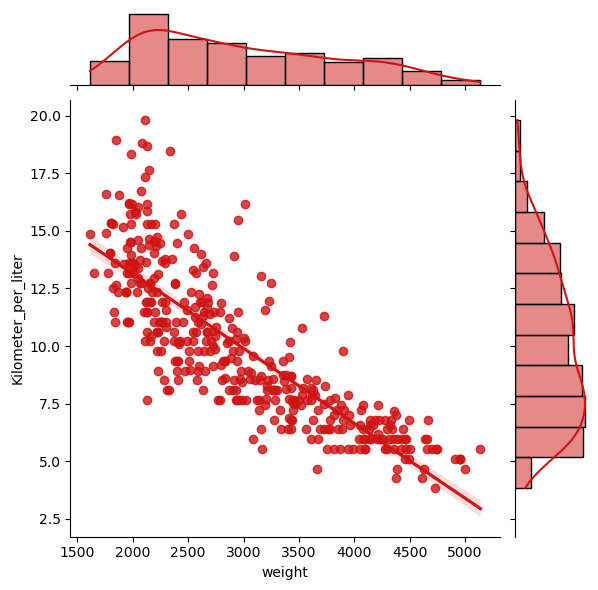

In [209]:
sns.jointplot(x = data_2.weight,y = data_2.Kilometer_per_liter,kind = "reg", color = "#ce1414")
plt.show()

#### Analysis of kilometer_per_liter with accleration

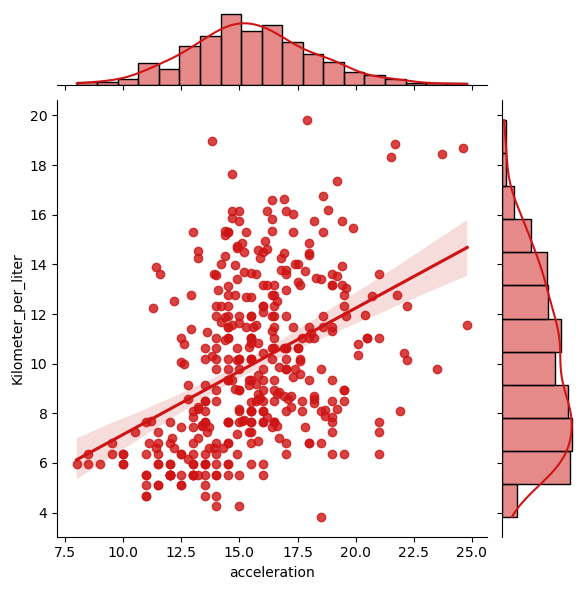

In [210]:
sns.jointplot(x = data_2.acceleration,y = data_2.Kilometer_per_liter,kind = "reg", color = "#ce1414")
plt.show()

#### Analysis of kilometer_per_liter with displacement

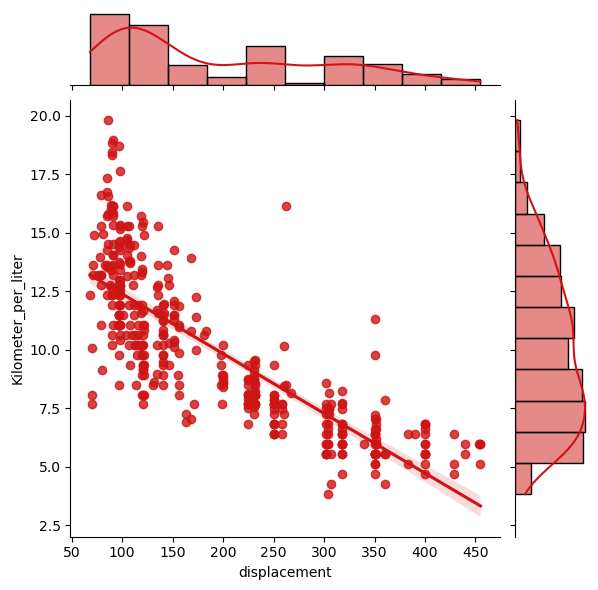

In [211]:
sns.jointplot(x = data_2.displacement,y = data_2.Kilometer_per_liter,kind = "reg", color = "#ce1414")
plt.show()

#### Analysis of kilometer_per_liter with cylinders

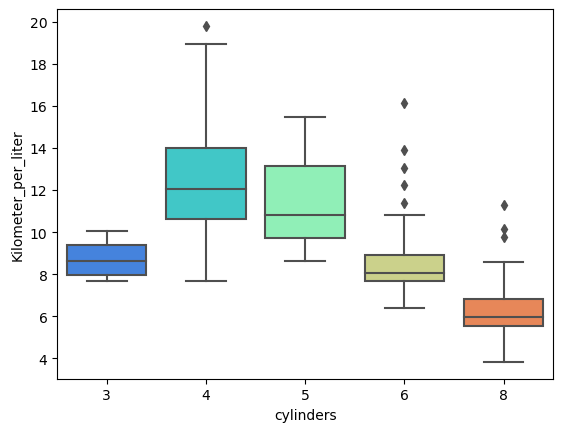

In [212]:
sns.boxplot(y = "Kilometer_per_liter", x = "cylinders", data = data_2 , palette = "rainbow")
plt.show()

**We can easily visualize that the mileage per gallon (mpg) of 4 cylinder vehicles is maximum and we also saw that most of the vehicles are 4 cylinder.**

#### Analysis of kilometer_per_liter with year

In [213]:
sns.boxplot(y = "Kilometer_per_liter", x = "year", data = data_2, palette = "")

ValueError:  is not a valid palette name

**With every year and with the newer models of the vehicles mileage per gallon (mpg) also increases.**

#### Covariance

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data_2.cov(), annot = True, linewidth = 0.5, center = 0, cmap = "bwr")
plt.show()

**A positive covariance means that asset returns move together while a negative covariance means they move inversely.**

#### Correlation

In [ ]:
dat_num = data_2.select_dtypes(include = "number")

In [ ]:
corr = dat_num.corr()
corr

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot = True,linewidths = 0.5,fmt = ".1f",ax = ax)

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

plt.title('Correlation between features', fontsize=15)

plt.show()

In [ ]:
drop_list = ['weight','displacement','manufracturer', 'model']
data_cleaned = data_2.drop(drop_list,axis = 1)        
data_cleaned.head()

In [ ]:
data_cleaned.head()

In [214]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   origin                   392 non-null    object 
 1   cylinders                392 non-null    object 
 2   horsepower               392 non-null    float64
 3   acceleration             392 non-null    float64
 4   year                     392 non-null    int64  
 5   Kilometer_per_liter      392 non-null    float64
 6   log_Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 32.6+ KB


In [215]:
data_cleaned.columns

Index(['origin', 'cylinders', 'horsepower', 'acceleration', 'year',
       'Kilometer_per_liter', 'log_Kilometer_per_liter'],
      dtype='object')

In [216]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first = True)
data_with_dummies.head()

,horsepower,acceleration,year,Kilometer_per_liter,log_Kilometer_per_liter,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.0,12.0,1970,7.652587,2.035044,0,0,0,0,0,1
1,165.0,11.5,1970,6.377156,1.852722,0,0,0,0,0,1
2,150.0,11.0,1970,7.652587,2.035044,0,0,0,0,0,1
3,150.0,12.0,1970,6.802299,1.917261,0,0,0,0,0,1
4,140.0,10.5,1970,7.227443,1.977885,0,0,0,0,0,1


#### Standardise Data

In [217]:
from sklearn.preprocessing import MinMaxScaler

In [218]:
x = data_with_dummies.drop(["Kilometer_per_liter","log_Kilometer_per_liter"],axis = 1)

In [219]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [220]:
X=scaler.fit_transform(x)
y = data_with_dummies.log_Kilometer_per_liter

In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 10)

print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (313, 9)
X_test (79, 9)
y_train (313,)
y_test (79,)


# Linear Regression Model ols().fit()

Now we build a Linear regression model. We start with our data set gradually proceeding with our analysis

In order to build a Linear regression model, we do the following:
1. Build the model
2. Predict the values
3. Compute the accuracy measures
4. Tabulate the results

In [222]:
from sklearn.linear_model import LinearRegression
OLS_model = LinearRegression()

In [223]:
OLS_model.fit(X_train,y_train)

LinearRegression()

#### Predict the Values

In [224]:
y_pred_OLS = OLS_model.predict(X_test)

In [225]:
y_test

243    2.212725
371    2.511968
300    2.318550
345    2.702873
265    2.006873
263    2.018237
214    1.709621
44     1.709621
326    2.915131
57     2.322726
128    1.852722
154    1.852722
397    2.578659
388    2.402769
62     1.709621
66     1.977885
101    2.280166
183    2.363548
26     1.447257
6      1.783729
229    1.917261
278    2.594660
48     2.035044
213    1.709621
1      1.852722
67     1.542567
133    1.917261
279    2.529062
283    2.150355
24     2.189194
191    2.235714
257    2.109945
396    2.476876
193    2.322726
259    2.179625
238    2.656217
244    2.908195
165    2.140404
89     1.852722
313    2.476876
176    2.089111
174    2.035044
311    2.613528
359    2.480442
207    2.140404
159    1.783729
115    1.852722
344    2.808234
253    2.165097
240    2.562399
114    2.402769
106    1.629579
100    2.035044
140    1.783729
12     1.852722
389    2.235714
169    2.140404
79     2.402769
111    2.035044
255    2.367540
303    2.604138
132    2.363548
228    2

In [226]:
y_pred_OLS

array([2.16360094, 2.56260172, 2.07743277, 2.75547584, 2.01032532,
       1.9517593 , 1.97558361, 1.71052225, 2.56040662, 2.38071727,
       2.06110833, 2.12621046, 2.4990872 , 2.5589684 , 1.78075993,
       1.85811808, 2.07887721, 2.45540545, 1.5096844 , 1.54851893,
       1.86203985, 2.59400125, 2.09042462, 1.97276429, 1.73987932,
       1.61082212, 2.06110833, 2.63195537, 2.20884786, 2.04511708,
       2.14671224, 2.20438016, 2.5294666 , 2.18435827, 2.23726515,
       2.44035618, 2.55573059, 2.07071065, 1.86258578, 2.4737404 ,
       2.131346  , 2.15345681, 2.58398354, 2.51413647, 2.38756797,
       1.90171262, 1.87417396, 2.61726482, 2.16084677, 2.55414298,
       2.36790161, 1.72916628, 2.09936002, 1.82445986, 1.84918269,
       2.26283926, 2.10816964, 2.38228872, 2.14948924, 2.45453251,
       2.61569013, 2.37521469, 2.10470286, 2.05664063, 2.66798993,
       2.41383342, 1.83064057, 2.3678281 , 2.31779018, 1.81283092,
       1.49715645, 2.6571764 , 2.35124227, 2.56572693, 2.60720

**Before we compute accuracy let's plot the predicted values**

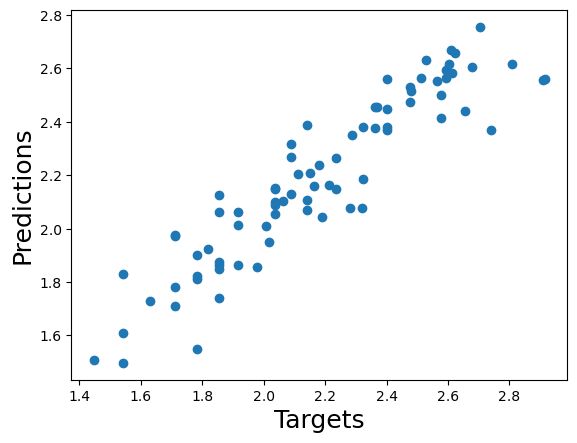

In [227]:
plt.scatter(y_test,y_pred_OLS)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

#### Our model fit well to some extent

#### Compute accuracy measures

In [228]:
r_squared_OLS = OLS_model.score(X_train,y_train)
n = 313
p = 9
Adj_r_squared_OLS = 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_OLS = sqrt(mean_squared_error(y_test, y_pred_OLS))

In [231]:
cols = ["Model","R-Squared","Adj R-Squared","RMSE"]
result_tabulation = pd.DataFrame(columns = cols)
OLS_metrics = pd.Series({"Model":"OLS",
                         "R-Squared":r_squared_OLS,
                         "Adj R-Squared":Adj_r_squared_OLS,
                         "RMSE":rmse_OLS})
result_tabulation = result_tabulation.append(OLS_metrics,ignore_index = True)
result_tabulation

,Model,R-Squared,Adj R-Squared,RMSE
0,OLS,0.86382,0.859775,0.135834


# Linear Regression using SGD

**Now we build a Linear regression model using SGD Regressor. We start with our original data set gradually proceeding with our analysis**

In order to build a Linear regression model using SGD Regressor, we do the following:
1. Build the model
2. Predict the values
3. Compute the accuracy measures
4. Tabulate the results

In [136]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 1000)
SGD_model.fit(X_train, y_train)

SGDRegressor(alpha=0.1, loss='squared_loss')

In [137]:
y_pred_SGD = SGD_model.predict(X_test)

In [138]:
r_squared_SGD = SGD_model.score(X_train,y_train)
n = 313
p = 9
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_SGD = sqrt(mean_squared_error(y_test, y_pred_SGD))

In [232]:
SGD_metrics = pd.Series({"Model":"SGD",
                         "R-Squared":r_squared_SGD,
                         "Adj R-Squared":Adj_r_squared_SGD,
                         "RMSE":rmse_SGD})


In [233]:
result_tabulation = result_tabulation.append(SGD_metrics, ignore_index = True)
result_tabulation

,Model,R-Squared,Adj R-Squared,RMSE
0,OLS,0.863820,0.859775,0.135834
1,SGD,0.731751,0.723784,0.195933
